<a href="https://colab.research.google.com/github/Elahe-hmh/ML_course/blob/master/Functional_API_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Complex Models Using the Functional API

**Multiple input!**

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
import tensorflow as tf
from tensorflow import keras

In [4]:
housing = fetch_california_housing()

In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [10]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))



Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 2.0696 - val_loss: 0.9178
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7875 - val_loss: 0.7210
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6719 - val_loss: 0.6558
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6191 - val_loss: 0.6169
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5904
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5624 - val_loss: 0.5696
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5450 - val_loss: 0.5541
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5313 - val_loss: 0.5429
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5204 - val_loss: 0.5337
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5125 - val_loss: 0.5261

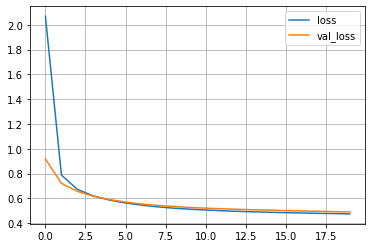

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4897


In [0]:
y_pred = model.predict((X_new_A, X_new_B))

In [14]:
y_test[0]

1.775

In [15]:
y_pred[0]

array([2.1474125], dtype=float32)

**Multiple output!**

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

if we pass a single loss, Keras will assume that the
same loss must be used for all outputs). By default, Keras will compute all these losses
and simply add them up to get the final loss used for training. We care much more
about the main output than about the auxiliary output (as it is just used for regulari‐
zation), so we want to give the main output’s loss a much greater weight


In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

provide labels for each output.

In this
example, the main output and the auxiliary output should try to predict the same
thing, so they should use the same labels

In [18]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9581 - main_output_loss: 0.8561 - aux_output_loss: 1.8754 - val_loss: 0.6238 - val_main_output_loss: 0.5520 - val_aux_output_loss: 1.2697
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5925 - main_output_loss: 0.5230 - aux_output_loss: 1.2186 - val_loss: 0.6472 - val_main_output_loss: 0.5998 - val_aux_output_loss: 1.0738
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5619 - main_output_loss: 0.5108 - aux_output_loss: 1.0215 - val_loss: 0.5272 - val_main_output_loss: 0.4806 - val_aux_output_loss: 0.9462
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5028 - main_output_loss: 0.4611 - aux_output_loss: 0.8780 - val_loss: 0.5046 - val_main_output_loss: 0.4691 - val_aux_output_loss: 0.8242
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4821 - main_output_loss: 0.4499 - aux_output_loss: 0.7720 - val_loss

When we evaluate the model, Keras will return the total loss

In [19]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.3973 - main_output_loss: 0.3809 - aux_output_loss: 0.5453


In [0]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [21]:
y_test[0]

1.775

In [22]:
y_pred_main[0]

array([1.9273801], dtype=float32)

In [23]:
 y_pred_aux[0]

array([1.6562091], dtype=float32)